<a href="https://colab.research.google.com/github/kailashkumar-S/kailashkumar-S/blob/main/Heston_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heston Model

The Heston Model is a stochastic model for asset prices, which assumes that the volatility of the underlying asset is not constant but follows a random process.

The basic Heston model assumes that St, the price of the asset, is determined by a stochastic process.

\begin{align*}
dS_t =μ(S_t,t)dt + σ(S_t,t)dW_t^S
\end{align*}

and the volatality $\sqrt{V_t}$ follows an Ornstein-Uhlenbeck process


\begin{align*}
dV_t =-Θ\sqrt{V_t}dt + \xi\sqrt{V_t}dW_t^v
\end{align*}

Using ito's lemma, the instantaneous variance is given by a Feller square root or CIR process

\begin{align*}
dV_t = Κ(Θ-V_t)dt + \xi\sqrt{V_t}dW_t^v
\end{align*}

where

$\nu _{0}$ - is the initial variance.

$\theta$ - is the long variance, or long-run average variance of the price

$\rho$ - is the correlation of the two Wiener processes.

$\kappa$ - is the rate at which $νt$ reverts to $θ$.

$\xi$ - is the volatility of the volatility, or 'vol of vol', which determines the variance of νt.

\\

**Using Ito's lemma to to derive the process followed by a function of price given by logS**

when S follows a process given by
\begin{align*}
dS_t =μSdt + σSdZ
\end{align*}

Ito's lemma describes the process followed by this function F as

\begin{align*}
dF = (μS\frac{∂F}{∂S} + \frac{∂F}{∂t} + \frac{∂^2F}{∂^2S}\frac{1}{2}σ^2S^2)dt + \frac{∂F}{∂S}σSdZ
\end{align*}

Therefore for

\begin{align*}
F = lnS
\end{align*}

\begin{align*}
\frac{\partial F}{∂S} = \frac{1}{S} \quad\quad \frac{\partial^2 F}{∂^2S} = \frac{-1}{S^2} \quad\quad \frac{\partial F}{∂t} = 0
\end{align*}

Substituting the values gives us

\begin{align*}
dF = (μ - \frac{σ^2}{2})dt + σdZ
\end{align*}

Now, substituting F and $\sigma$, the final equation for the price of a stock after a step change is given by

\begin{align*}
ln(S_t) = ln(S_{t-1}) + (μ - \frac{V_t}{2})dt + \sqrt{V_t}dZ
\end{align*}

\begin{align*}
dZ = \sqrt{dt}ϵ_s
\end{align*}

\begin{align*}
S_t = S_{t-1}e^{(μ - \frac{V_t}{2})dt + \sqrt{V_t dt}ϵ_s}
\end{align*}

where the $V_t$ is modeled using the heston model as

\begin{align*}
dV_t = Κ(Θ-V_t)dt + \xi\sqrt{V_td_t}ϵ_v
\end{align*}

To generate $ϵ_s$ and $ϵ_v$ with correlation $ρ$, we generate two independent standard normal variables $Z_1$ and $Z_2$, and we set
\begin{align*}
ϵ_v = Z_1 \quad\text{and}\quad ϵ_s = ρZ_1 + \sqrt{1-ρ^2}Z_2
\end{align*}

But in this program we will generate a multinormal distribution using the the mean and covariance matrix between the two distributions.

Since the underlying two distributions are normal with mean 0 and standard deviation 1. The mean matrix is given by $\begin{bmatrix}0 & 0\end{bmatrix}^T$ and the covariance matrix is given by $\begin{bmatrix}1 & ρ\\ρ & 1
\end{bmatrix}$

In [2]:
%%capture
! pip install py_vollib_vectorized

In [3]:
%%capture
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import py_vollib_vectorized as py_volib
import seaborn as sea

In [4]:
# A function that imports data of a given securities from Yahoo Finance
def data_download(sec_id,start_date,end_date):
    ticker = yf.Ticker(sec_id)
    ticker.history(start=start_date, end=end_date)
    hist = ticker.history(start=start_date, end=end_date)['Close']
    returns = hist.pct_change()
    returns = returns.dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return ticker, mean_returns, std_returns, hist

In [5]:
# Initialise using any stock ID
sec_id = "AAPL"

# Setting the time period of observations
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365)

In [6]:
#Calling the function to get the values
ticker, mean_returns, std_returns, hist = data_download(sec_id,start_date,end_date)
ticker.history(start=start_date, end=end_date)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-30 00:00:00-04:00,190.617678,193.452613,190.249622,192.945312,85069600,0.0,0.0
2023-07-03 00:00:00-04:00,192.756302,192.855780,190.746969,191.443283,31458200,0.0,0.0
2023-07-05 00:00:00-04:00,190.558013,191.960552,189.613019,190.319275,46920300,0.0,0.0
2023-07-06 00:00:00-04:00,188.837113,191.005604,188.200495,190.796707,45094300,0.0,0.0
2023-07-07 00:00:00-04:00,190.398838,191.652177,189.235021,189.672684,46778000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,207.720001,212.699997,206.589996,208.139999,80727000,0.0,0.0
2024-06-25 00:00:00-04:00,209.149994,211.380005,208.610001,209.070007,56713900,0.0,0.0
2024-06-26 00:00:00-04:00,211.500000,214.860001,210.639999,213.250000,66213200,0.0,0.0


In [7]:
#Input parameters for sde
S0 = hist.iloc[len(hist)-1]
dt = 1/252
r = mean_returns

#Input parameters for heston model
kappa = 5                  # rate of mean reversion of variance
theta = std_returns**2     # long-term mean variance
V0 = 0.0025**2             # initial variance
#rho = 0.9                 # correlation between returns and variance
vol_vol = 0.05             # volatility of volatility

#Simulation parameters
n_sims = 1000            # no. of simulations
T = 7                    # Time steps

In [8]:
def montecarlosim(S0,dt,r,kappa,theta,V0,rho,vol_vol,n_sims,T):
#Heston Model
  stock_sims = np.full(shape=(T+1,n_sims),fill_value=S0)
  vol_sims = np.full(shape=(T+1,n_sims),fill_value=V0)

  mean = np.array([0.0, 0.0])
  cov = np.array([[1, rho], [rho, 1]])
  Z = np.random.multivariate_normal(mean=mean, cov=cov, size=[T, n_sims])

#Running the Monte Carlo Simulation
  for i in range(1,T+1):
    stock_sims[i] = stock_sims[i-1] * np.exp((r - 0.5 * vol_sims[i-1]) * dt + np.sqrt(vol_sims[i-1] * dt) * Z[i-1,:,0])
    vol_sims[i] = np.maximum( vol_sims[i-1] + kappa * (theta - vol_sims[i-1]) * dt + vol_vol * np.sqrt(vol_sims[i-1] * dt) * Z[i-1,:,1],0)

  return stock_sims, vol_sims

stock_sims_1 , vol_sim_1 = montecarlosim(S0,dt,r,kappa,theta,V0,0.9,vol_vol,n_sims,T)
stock_sims_2 , vol_sim_2 = montecarlosim(S0,dt,r,kappa,theta,V0,-0.9,vol_vol,n_sims,T)


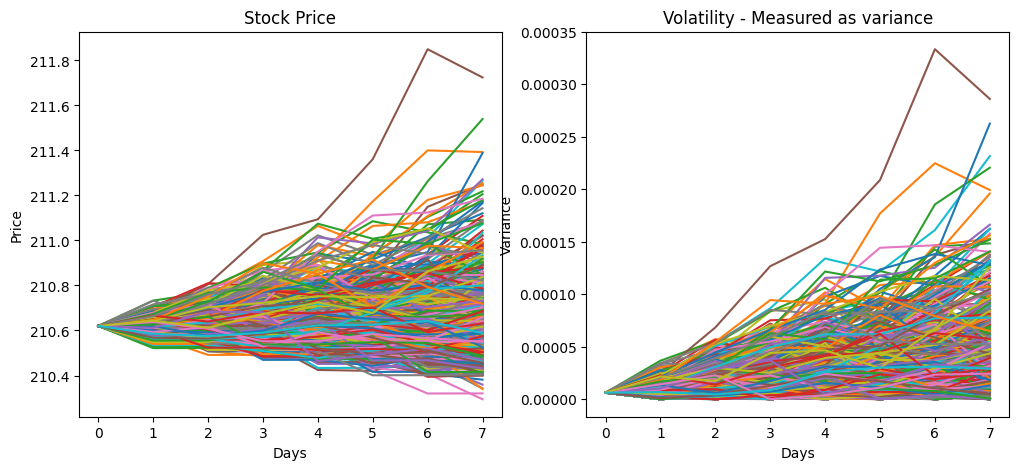

In [13]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,T+1)
ax1.plot(time,stock_sims_1)
ax1.set_title('Stock Price')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price')

ax2.plot(time,vol_sim_1)
ax2.set_title('Volatility - Measured as variance')
ax2.set_xlabel('Days')
ax2.set_ylabel('Variance')
plt.show()


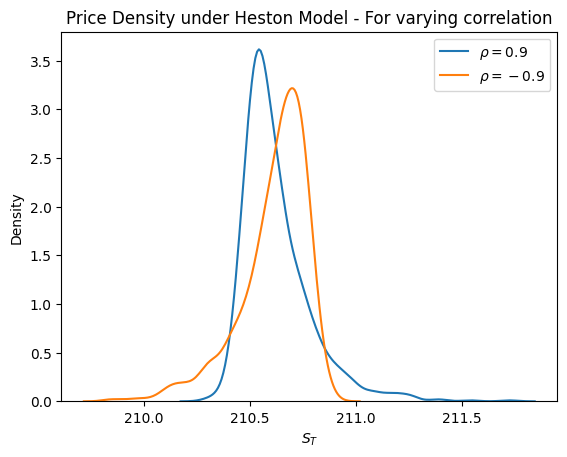

In [11]:
fig, ax = plt.subplots()

ax = sea.kdeplot(stock_sims_1[-1], label=r"$\rho= 0.9$", ax=ax)
ax = sea.kdeplot(stock_sims_2[-1], label=r"$\rho= -0.9$", ax=ax)
plt.title(r'Price Density under Heston Model - For varying correlation')
plt.xlabel('$S_T$')
plt.ylabel('Density')
plt.legend()
plt.show()